# Starting the analysis for House Prices: Advanced Regression Techniques

# Importing data 

In [1]:
# importing all important libraries
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.shape

(1460, 81)

In [111]:
dataset.iloc[:,1:]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1430          60       RL         60.0    21930   Pave   NaN      IR3   
1431         120       RL          NaN     4928   Pave   NaN      IR1   
1432          30       RL         60.0    10800   Pave  Grvl      Reg   
1433          60       RL         93.0    10261   Pave   NaN      IR1   
1434          20       RL         80.0    17400   Pave   NaN      Reg   
1435          20       RL         80.0     8400   Pave   NaN      Reg   
1436          20       RL         60.0     9000   Pave   NaN      Reg   
1437          20       RL         96.0    12444   Pave   NaN      Reg   
1438          20       RM         90.0     7407   Pave   NaN      Reg   
1439          60       RL         80.0    11584   Pave   NaN      Reg   
1440          70       RL         79.0    11526   Pave   NaN      IR1   
1441         120       RM          NaN     4426   Pave   NaN      Reg   
1442          60       FV         85.0    11003   Pave   NaN      Reg   
1443          30       RL          NaN     8854   Pave   NaN      Reg   
1444          20       RL         63.0     8500   Pave   NaN      Reg   
1445          85       RL         70.0     8400   Pave   NaN      Reg   
1446          20       RL          NaN    26142   Pave   NaN      IR1   
1447          60       RL         80.0    10000   Pave   NaN      Reg   
1448          50       RL         70.0    11767   Pave   NaN      Reg   
1449         180       RM         21.0     1533   Pave   NaN      Reg   
1450          90       RL         60.0     9000   Pave   NaN      Reg   
1451          20       RL         78.0     9262   Pave   NaN      Reg   
1452         180       RM         35.0     3675   Pave   NaN    

In [98]:
dataset_Xandy = dataset.columns

In [99]:
dataset_X = dataset_Xandy[:-1]
dataset_y = dataset_Xandy[-1:]

In [20]:
# Identifier and the Column name in X (Independent Variables)
for i,j in enumerate(dataset_X):
    print(i, j)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 Alley
7 LotShape
8 LandContour
9 Utilities
10 LotConfig
11 LandSlope
12 Neighborhood
13 Condition1
14 Condition2
15 BldgType
16 HouseStyle
17 OverallQual
18 OverallCond
19 YearBuilt
20 YearRemodAdd
21 RoofStyle
22 RoofMatl
23 Exterior1st
24 Exterior2nd
25 MasVnrType
26 MasVnrArea
27 ExterQual
28 ExterCond
29 Foundation
30 BsmtQual
31 BsmtCond
32 BsmtExposure
33 BsmtFinType1
34 BsmtFinSF1
35 BsmtFinType2
36 BsmtFinSF2
37 BsmtUnfSF
38 TotalBsmtSF
39 Heating
40 HeatingQC
41 CentralAir
42 Electrical
43 1stFlrSF
44 2ndFlrSF
45 LowQualFinSF
46 GrLivArea
47 BsmtFullBath
48 BsmtHalfBath
49 FullBath
50 HalfBath
51 BedroomAbvGr
52 KitchenAbvGr
53 KitchenQual
54 TotRmsAbvGrd
55 Functional
56 Fireplaces
57 FireplaceQu
58 GarageType
59 GarageYrBlt
60 GarageFinish
61 GarageCars
62 GarageArea
63 GarageQual
64 GarageCond
65 PavedDrive
66 WoodDeckSF
67 OpenPorchSF
68 EnclosedPorch
69 3SsnPorch
70 ScreenPorch
71 PoolArea
72 PoolQC
73 Fence


In [21]:
# Casually priting the Identifier and the target 
for i, j in enumerate(dataset_y):
    print(i,j)

0 SalePrice


In [26]:
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [25]:
# This is important as we could see how many data elements are non-null and the data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [28]:
# Finding the Unique values in a column
dataset['Street'].unique().tolist()

['Pave', 'Grvl']

In [34]:
dataset[['Street','SalePrice']]
filter = dataset['Street']=='Pave'

In [36]:
#generally filtering
dataset.where(filter, inplace = True)

In [94]:
dataset['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', nan, 'Alloca', 'Family'],
      dtype=object)

In [82]:
dataset['3SsnPorch'].shape

(1460,)

In [9]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histogram of the dataset

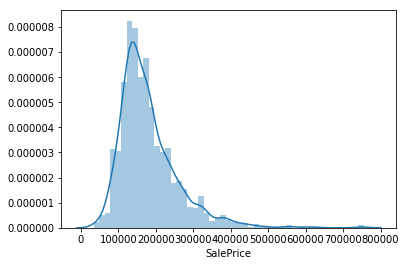

In [11]:
sns.distplot(dataset['SalePrice'])

In [15]:
print("Skewness: %f" % dataset['SalePrice'].skew())
print("Kurtosis: %f" % dataset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Kurtosis is high as we see we have more number of outliers. Higher kurtosis (Positive Kurtosis denotes the existence of outliers)

# Independent Variables of Interest to predict the SalePrice are
1. GrLivArea
2. TotalBsmtSF
3. OverallQual
4. YearBuilt

In [17]:
# drawing the scatter plots with each Independent Variables against the Dependent variables

# GrLivArea vs SalePrice

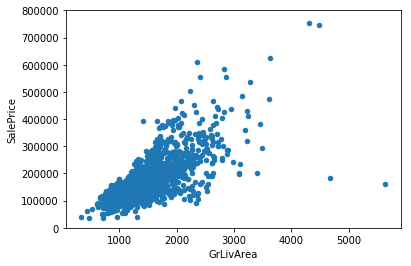

In [91]:
var = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0, 800000))

In [23]:
dataset[['GrLivArea','SalePrice']].max

GrLivArea  SalePrice
0          1710     208500
1          1262     181500
2          1786     223500
3          1717     140000
4          2198     250000
5          1362     143000
6          1694     307000
7          2090     200000
8          1774     129900
9          1077     118000
10         1040     129500
11         2324     345000
12          912     144000
13         1494     279500
14         1253     157000
15          854     132000
16         1004     149000
17         1296      90000
18         1114     159000
19         1339     139000
20         2376     325300
21         1108     139400
22         1795     230000
23         1060     129900
24         1060     154000
25         1600     256300
26          900     134800
27         1704     306000
28         1600     207500
29          520      68500
...         ...        ...
1430       1838     192140
1431        958     143750
1432        968      64500
1433       1792     186500
1434       1126     160000
1435       1537     174000
1436        864     120500
1437       1932     394617
1438       1236     149700
1439       1725     197000
1440       2555     191000
1441        848     149300
1442       2007     310000
1443        952     121000
1444       1422     179600
1445        913     129000
1446       1188     157900
1447       2090     240000
1448       1346     112000
1449        630      92000
1450       1792     136000
1451       1578     287090
1452       1072     145000
1453       1140      84500
1454       1221     185000
1455       1647     175000
1456       2073     210000
1457       2340     266500
1458       1078     142125
1459       1256     147500

[1460 rows x 2 columns]

In [29]:
dataset['GrLivArea'].min()
dataset['SalePrice'].max()

755000

# TotalBsmtSF vs SalePrice

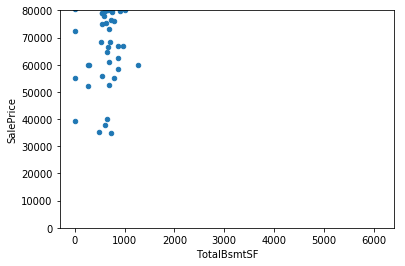

In [32]:
var = 'TotalBsmtSF'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0, 80000))

In [35]:
dataset[var].max()

6110

# Overallqual vs SalePrice

In [36]:
# Overall quality is in the range of 1 - 10.

(-0.5, 9.5, 0, 800000)

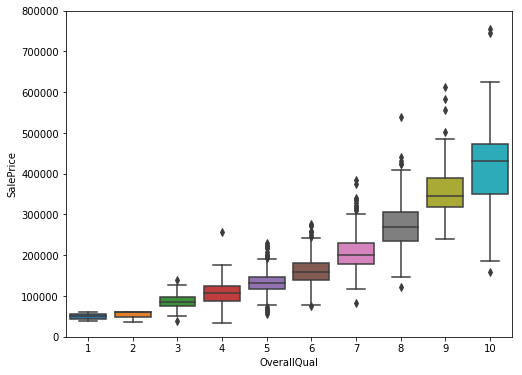

In [42]:
var = 'OverallQual'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

# YearBuilt vs SalePrice

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

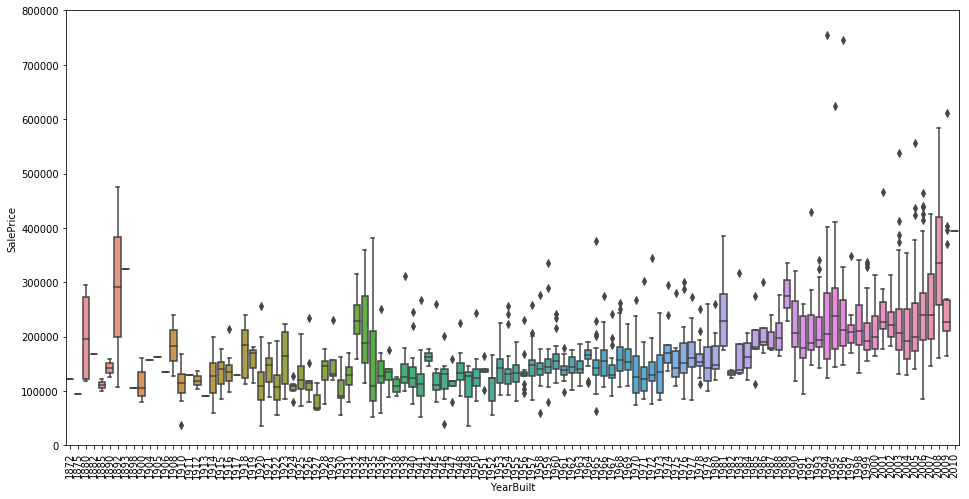

In [43]:
var = 'YearBuilt'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

# Observations from the plots:
Conclusion
'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

# To understand this better we might draw the Correlation Map

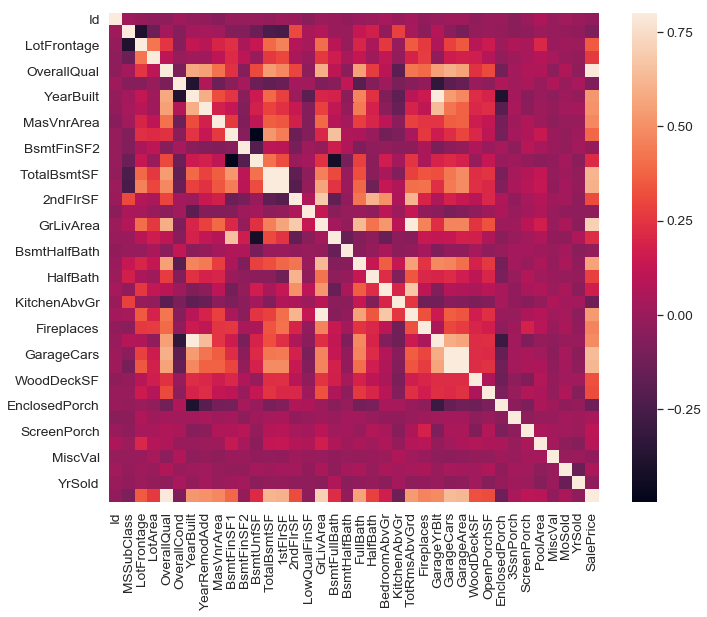

In [62]:
#corrmat = dataset.iloc[:,1:].corr() #dataset is modified to remove Id column
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# 'SalePrice' correlation matrix (zoomed heatmap style)

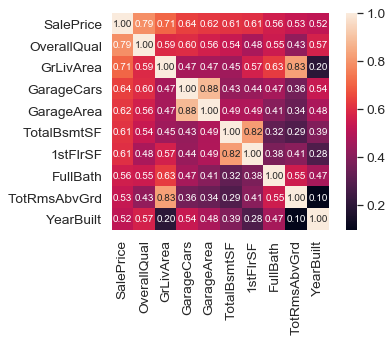

In [63]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [66]:
# Analysing the above heatmap 

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.
Let's proceed to the scatter plots.

# Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

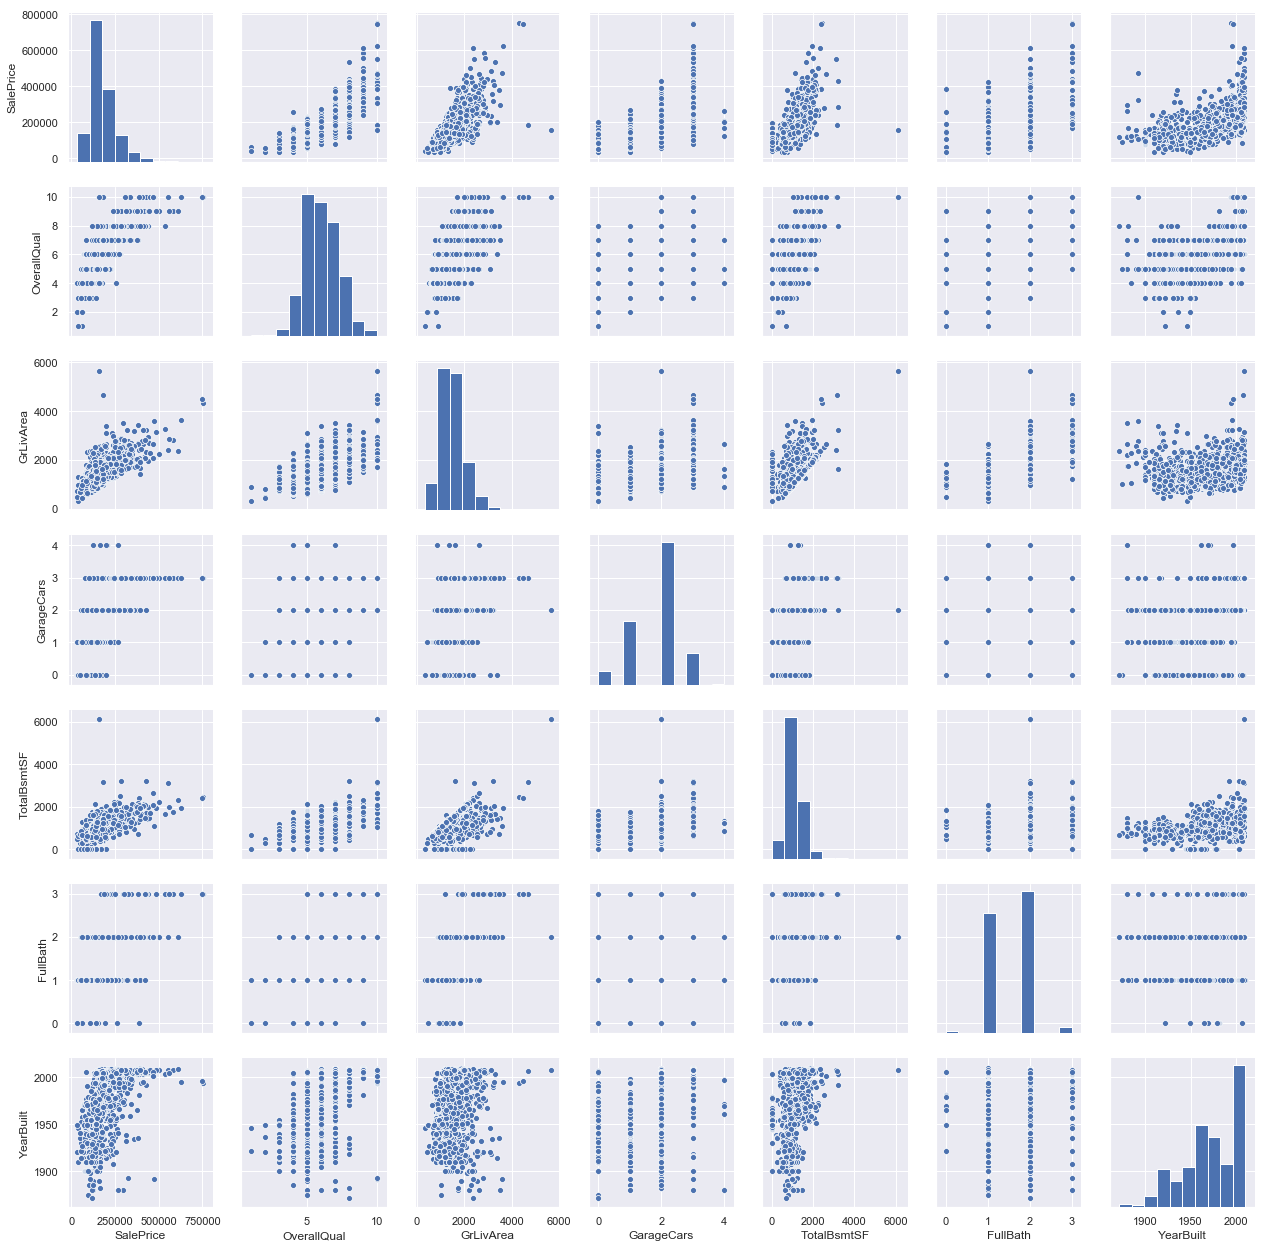

In [68]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataset[cols], size = 2.5)
plt.show();

# observations from the above diagram

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

# Analysing the Missing data

In [22]:
total = dataset.isnull().sum().sort_values(ascending=False)
percentage = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis = 1, keys=['Total','Percentage'])
print(missing_data)
print(type(total), type(percentage), type(missing_data))

               Total  Percentage
PoolQC          1453    0.995205
MiscFeature     1406    0.963014
Alley           1369    0.937671
Fence           1179    0.807534
FireplaceQu      690    0.472603
LotFrontage      259    0.177397
GarageCond        81    0.055479
GarageType        81    0.055479
GarageYrBlt       81    0.055479
GarageFinish      81    0.055479
GarageQual        81    0.055479
BsmtExposure      38    0.026027
BsmtFinType2      38    0.026027
BsmtFinType1      37    0.025342
BsmtCond          37    0.025342
BsmtQual          37    0.025342
MasVnrArea         8    0.005479
MasVnrType         8    0.005479
Electrical         1    0.000685
Utilities          0    0.000000
YearRemodAdd       0    0.000000
MSSubClass         0    0.000000
Foundation         0    0.000000
ExterCond          0    0.000000
ExterQual          0    0.000000
Exterior2nd        0    0.000000
Exterior1st        0    0.000000
RoofMatl           0    0.000000
RoofStyle          0    0.000000
YearBuilt 

In [30]:
missing_data

Total  Percentage
PoolQC          1453    0.995205
MiscFeature     1406    0.963014
Alley           1369    0.937671
Fence           1179    0.807534
FireplaceQu      690    0.472603
LotFrontage      259    0.177397
GarageCond        81    0.055479
GarageType        81    0.055479
GarageYrBlt       81    0.055479
GarageFinish      81    0.055479
GarageQual        81    0.055479
BsmtExposure      38    0.026027
BsmtFinType2      38    0.026027
BsmtFinType1      37    0.025342
BsmtCond          37    0.025342
BsmtQual          37    0.025342
MasVnrArea         8    0.005479
MasVnrType         8    0.005479
Electrical         1    0.000685
Utilities          0    0.000000
YearRemodAdd       0    0.000000
MSSubClass         0    0.000000
Foundation         0    0.000000
ExterCond          0    0.000000
ExterQual          0    0.000000
Exterior2nd        0    0.000000
Exterior1st        0    0.000000
RoofMatl           0    0.000000
RoofStyle          0    0.000000
YearBuilt          0    0.000000
...              ...         ...
GarageArea         0    0.000000
PavedDrive         0    0.000000
WoodDeckSF         0    0.000000
OpenPorchSF        0    0.000000
3SsnPorch          0    0.000000
BsmtUnfSF          0    0.000000
ScreenPorch        0    0.000000
PoolArea           0    0.000000
MiscVal            0    0.000000
MoSold             0    0.000000
YrSold             0    0.000000
SaleType           0    0.000000
Functional         0    0.000000
TotRmsAbvGrd       0    0.000000
KitchenQual        0    0.000000
KitchenAbvGr       0    0.000000
BedroomAbvGr       0    0.000000
HalfBath           0    0.000000
FullBath           0    0.000000
BsmtHalfBath       0    0.000000
BsmtFullBath       0    0.000000
GrLivArea          0    0.000000
LowQualFinSF       0    0.000000
2ndFlrSF           0    0.000000
1stFlrSF           0    0.000000
CentralAir         0    0.000000
SaleCondition      0    0.000000
Heating            0    0.000000
TotalBsmtSF        0    0.000000
Id                 0    0.000000

[81 rows x 2 columns]

# Missing data removal after analysis

#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

In [50]:
dataset = dataset.drop(missing_data[missing_data['Total'] > 1].index, 1)

In [59]:
dataset = dataset.drop(dataset.loc[dataset['Electrical'].isnull()].index)

In [65]:
# Checking the missing data - if still exists
dataset.isnull().sum().max()

0

In [45]:
help(dataset.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index, columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    
        .. versionadded:: 0.21.0
    level : int or level name, optional
        For MultiIndex, level

In [46]:
data = pd.DataFrame(np.arange(12).reshape(3,4), columns=['A','B','C','D'])

In [47]:
data

A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

In [49]:
data.drop(['B', 'C'], axis=1)

A   D
0  0   3
1  4   7
2  8  11

In [51]:
dataset

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1430  1431          60       RL    21930   Pave      IR3         Lvl   
1431  1432         120       RL     4928   Pave      IR1         Lvl   
1432  1433          30       RL    10800   Pave      Reg         Lvl   
1433  1434          60       RL    10261   Pave      IR1         Lvl   
1434  1435          20       RL    17400   Pave      Reg         Low   
1435  1436          20       RL     8400   Pave      Reg         Lvl   
1436  1437          20       RL     9000   Pave      Reg         Lvl   
1437  1438          20       RL    12444   Pave      Reg         Lvl   
1438  1439          20       RM     7407   Pave      Reg         Lvl   
1439  1440          60       RL    11584   Pave      Reg         Lvl   
1440  1441          70       RL    11526   Pave      IR1         Bnk   
1441  1442         120       RM     4426   Pave      Reg         Lvl   
1442  1443          60       FV    11003   Pave      Reg         Lvl   
1443  1444          30       RL     8854   Pave      Reg         Lvl   
1444  1445          20       RL     8500   Pave      Reg         Lvl   
1445  1446          85       RL     8400   Pave      Reg         Lvl   
1446  1447          20       RL    26142   Pave      IR1         Lvl   
1447  1448          60       RL    10000   Pave      Reg         Lvl   
1448  1449          50       RL    11767   Pave      Reg         Lvl   
1449  1450         180       RM     1533   Pave      Reg         Lvl   
1450  1451          90       RL     9000   Pave      Reg         Lvl   
1451  1452          20       RL     9262   Pave      Reg         Lvl   
1452  1453         180       RM     3675   Pave      Reg         Lvl   
1453  1454          20       RL    17217   Pave 

In [67]:
dataset.shape

(1459, 63)

# Outliers

# Univariate Analysis

# Standardizing data is of utmost importance.

To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [69]:
from sklearn.preprocessing import StandardScaler

In [71]:
#standardizing the data
saleprice_scaled = StandardScaler().fit_transform(dataset['SalePrice'][:,np.newaxis])

In [74]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [80]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [85]:
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [86]:
high_range

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

# Bivariate Analysis

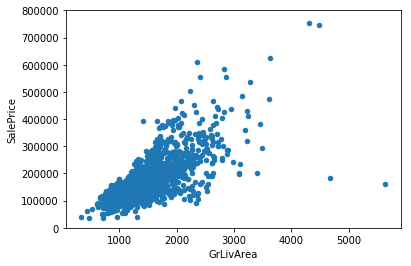

In [89]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [96]:
dataset[['GrLivArea','SalePrice']].sort_values('GrLivArea')

GrLivArea  SalePrice
533         334      39300
1100        438      60000
916         480      35311
29          520      68500
528         605      86000
696         616      89000
489         630      86000
434         630      81000
1449        630      92000
614         630      75500
1039        630      80000
649         630      84500
1212        672     113000
402         672     108000
1001        691      86000
1337        693      52500
438         694      90350
1123        698     118000
1323        708      82500
1321        720      72500
353         720     105900
495         720      34900
710         729      52000
68          747      80000
935         747      79900
372         752     125000
125         754      84500
264         764      73000
543         767     133000
952         768     133900
...         ...        ...
1386       2784     250000
1328       2792     256000
231        2794     403000
1312       2810     302000
803        2822     582933
1142       2828     424870
1046       2868     556581
961        2872     272000
1175       2872     285000
1024       2898     287000
58         2945     438780
324        2978     242000
1031       3082     197000
1173       3086     200500
197        3112     235000
798        3140     485000
608        3194     359100
118        3222     320000
496        3228     430000
1353       3238     410000
769        3279     538000
635        3395     200000
1268       3447     381000
304        3493     295000
185        3608     475000
1169       3627     625000
691        4316     755000
1182       4476     745000
523        4676     184750
1298       5642     160000

[1459 rows x 2 columns]

In [110]:
dataset[dataset['GrLivArea'] > 4000][['GrLivArea','SalePrice', 'MSZoning']]

GrLivArea  SalePrice MSZoning
523        4676     184750       RL
691        4316     755000       RL
1182       4476     745000       RL
1298       5642     160000       RL

In [117]:
# deleting the plots for which the SalePrice is less though the GrLivArea is higher.
# Getting those two rows
dataset.sort_values(by='GrLivArea', ascending=False)[:2]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
1298  1299          60       RL    63887   Pave      IR3         Bnk   
523    524          60       RL    40094   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298    AllPub    Corner       Gtl  ...             0         0           0   
523     AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
1298      480       0       1    2008       New        Partial    160000  
523         0       0      10    2007       New        Partial    184750  

[2 rows x 63 columns]

In [119]:
dataset = dataset.drop(dataset[dataset['Id'] == 1299].index)

In [120]:
#testing
dataset[dataset['Id']==1299]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual, ExterCond, Foundation, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 63 columns]

In [122]:
dataset = dataset.drop(dataset[dataset['Id']==524].index)

In [124]:
dataset.shape

(1457, 63)

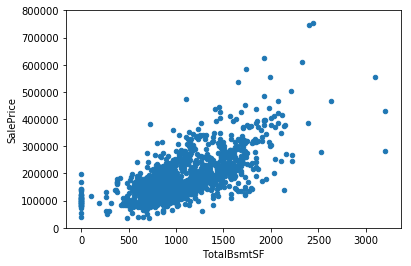

In [125]:
# bivariate analysis SalePrice vs var = 'GrLivArea'
var = 'TotalBsmtSF'
data = pd.concat([dataset['SalePrice'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [152]:
# removing outliers.
dataset.sort_values(by='TotalBsmtSF', ascending=False)[:2]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
332  333          20       RL    10655   Pave      IR1         Lvl    AllPub   
496  497          20       RL    12692   Pave      IR1         Lvl    AllPub   

    LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
332    Inside       Gtl  ...             0         0           0        0   
496    Inside       Gtl  ...           291         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
332       0      10    2009        WD         Normal    284000  
496       0       5    2007        WD         Normal    430000  

[2 rows x 63 columns]

In [145]:
# indexes to be deleted
(dataset['Id']==333).index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1457)

In [147]:
dataset.drop(dataset[dataset['Id']==497].index)

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1430  1431          60       RL    21930   Pave      IR3         Lvl   
1431  1432         120       RL     4928   Pave      IR1         Lvl   
1432  1433          30       RL    10800   Pave      Reg         Lvl   
1433  1434          60       RL    10261   Pave      IR1         Lvl   
1434  1435          20       RL    17400   Pave      Reg         Low   
1435  1436          20       RL     8400   Pave      Reg         Lvl   
1436  1437          20       RL     9000   Pave      Reg         Lvl   
1437  1438          20       RL    12444   Pave      Reg         Lvl   
1438  1439          20       RM     7407   Pave      Reg         Lvl   
1439  1440          60       RL    11584   Pave      Reg         Lvl   
1440  1441          70       RL    11526   Pave      IR1         Bnk   
1441  1442         120       RM     4426   Pave      Reg         Lvl   
1442  1443          60       FV    11003   Pave      Reg         Lvl   
1443  1444          30       RL     8854   Pave      Reg         Lvl   
1444  1445          20       RL     8500   Pave      Reg         Lvl   
1445  1446          85       RL     8400   Pave      Reg         Lvl   
1446  1447          20       RL    26142   Pave      IR1         Lvl   
1447  1448          60       RL    10000   Pave      Reg         Lvl   
1448  1449          50       RL    11767   Pave      Reg         Lvl   
1449  1450         180       RM     1533   Pave      Reg         Lvl   
1450  1451          90       RL     9000   Pave      Reg         Lvl   
1451  1452          20       RL     9262   Pave      Reg         Lvl   
1452  1453         180       RM     3675   Pave      Reg         Lvl   
1453  1454          20       RL    17217   Pave 

In [148]:
dataset.sort_values(by='TotalBsmtSF', ascending=False)[:2]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
332  333          20       RL    10655   Pave      IR1         Lvl    AllPub   
496  497          20       RL    12692   Pave      IR1         Lvl    AllPub   

    LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
332    Inside       Gtl  ...             0         0           0        0   
496    Inside       Gtl  ...           291         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
332       0      10    2009        WD         Normal    284000  
496       0       5    2007        WD         Normal    430000  

[2 rows x 63 columns]

In [150]:
dataset.shape

(1457, 63)

In [155]:
dataset = dataset.drop(dataset[dataset['Id']==333].index)

In [156]:
dataset.shape

(1456, 63)

In [157]:
dataset = dataset.drop(dataset[dataset['Id']==497].index)

In [159]:
dataset.shape

(1455, 63)

In [160]:
#testing
dataset[dataset['Id']==333]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual, ExterCond, Foundation, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageCars, GarageArea, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 63 columns]

# Further analysis of SalePrice

# Normality 
- When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.


# Homoscedasticity 
- Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

# Linearity
- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

# Absence of correlated errors 
- Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# Testing Normality of SalePrice

# Two ways of doing it

In [162]:
# Histogram - Kurtosis and skewness.
# Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

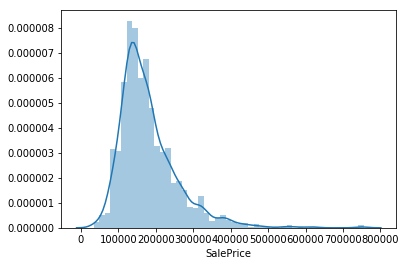

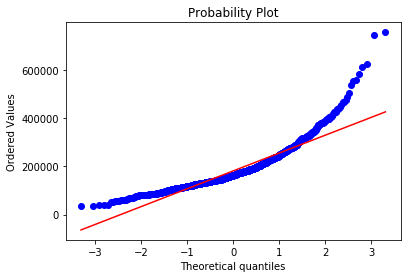

In [173]:
#Histogram
sns.distplot(dataset['SalePrice'])
#normal probability plot
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)

# Results of analysing the above histogram and probability plot

SalePrice shows peakedness, positive skewdness, does not follow the diagonal line.

Solution:
Log Transformation of the SalePrice

In [174]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

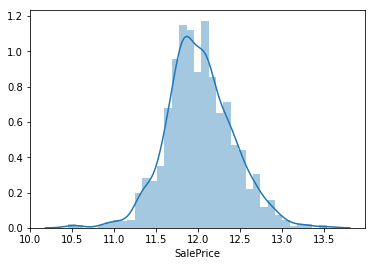

In [175]:
sns.distplot(dataset['SalePrice'])

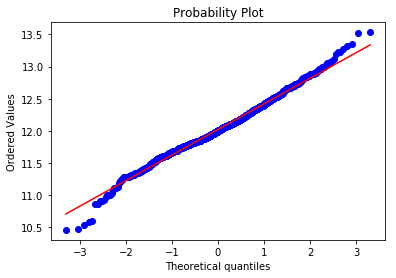

In [176]:
# Also getting the Normal Probability Plot
#normal probability plot
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)

# Observe the Transformation in SalePrice...

In [177]:
# Now lets observer the GrLiveArea

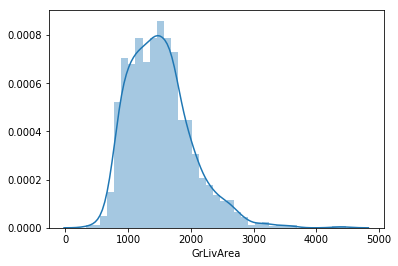

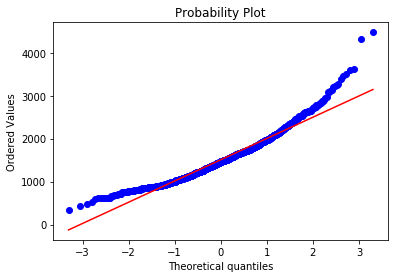

In [180]:
#histogram and normal probability plot
sns.distplot(dataset['GrLivArea']);
fig = plt.figure()
res = stats.probplot(dataset['GrLivArea'], plot=plt)

In [184]:
dataset['GrLivArea'].kurt()

2.05218886599317

In [185]:
# GrLivArea appears to be not normal

In [186]:
dataset['GrLivArea'] = np.log(dataset['GrLivArea'])

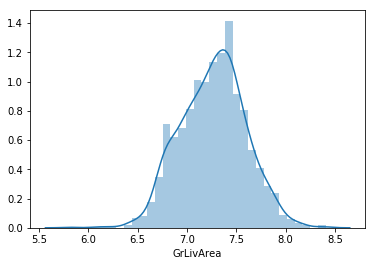

In [188]:
# histogram and dist plot of GrLivArea
histogram = sns.distplot(dataset['GrLivArea'])

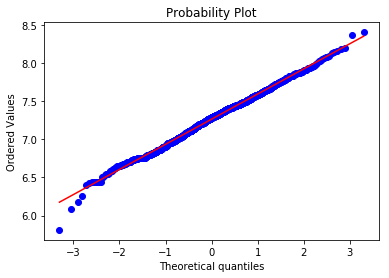

In [191]:
# Normal distribution graph for GrLivArea
fig = plt.figure()
res = stats.probplot(dataset['GrLivArea'], plot=plt)

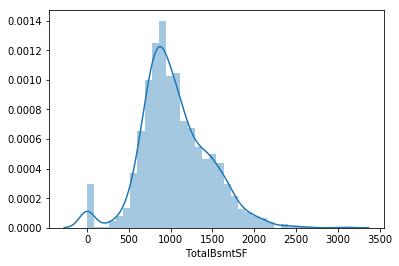

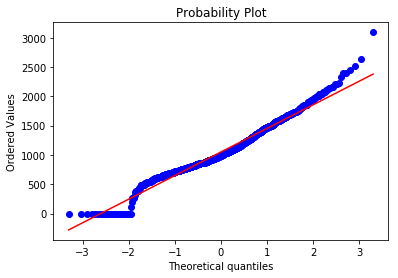

In [194]:
# Doing the same for TotalBsmtSF
#histogram and normal probability plot
sns.distplot(dataset['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(dataset['TotalBsmtSF'], plot=plt)

In [195]:
# Identify what is happening above. np.log(0) is -Inf.
# These are the data with the TotalBsmtSF is 0 to which we cannot apply log transformations

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [197]:
dataset['HasBsmt'] = pd.Series(len(dataset['TotalBsmtSF']), index = dataset.index)

In [198]:
dataset['HasBsmt'] = 0
dataset.loc[dataset['TotalBsmtSF'] > 0,'HasBsmt'] = 1

0       1455
1       1455
2       1455
3       1455
4       1455
5       1455
6       1455
7       1455
8       1455
9       1455
10      1455
11      1455
12      1455
13      1455
14      1455
15      1455
16      1455
17      1455
18      1455
19      1455
20      1455
21      1455
22      1455
23      1455
24      1455
25      1455
26      1455
27      1455
28      1455
29      1455
        ... 
1430    1455
1431    1455
1432    1455
1433    1455
1434    1455
1435    1455
1436    1455
1437    1455
1438    1455
1439    1455
1440    1455
1441    1455
1442    1455
1443    1455
1444    1455
1445    1455
1446    1455
1447    1455
1448    1455
1449    1455
1450    1455
1451    1455
1452    1455
1453    1455
1454    1455
1455    1455
1456    1455
1457    1455
1458    1455
1459    1455
Name: HasBsmt, Length: 1455, dtype: int64

In [199]:
#transform data
dataset.loc[dataset['HasBsmt']==1, 'TotalBsmtSF'] = np.log(dataset['TotalBsmtSF'])

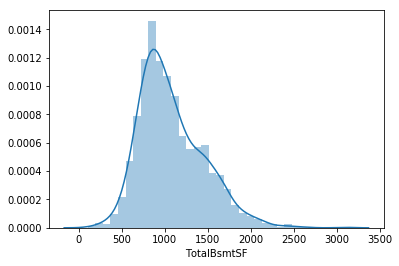

In [200]:
#histogram and normal distribution diagram
histogram = sns.distplot(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'])

In [201]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

((array([-3.2969521 , -3.03915216, -2.89575098, ...,  2.89575098,
          3.03915216,  3.2969521 ]),
  array([ 105.,  190.,  264., ..., 2524., 2633., 3094.])),
 (367.76949008591015, 1077.4393511988717, 0.9788632011157876))

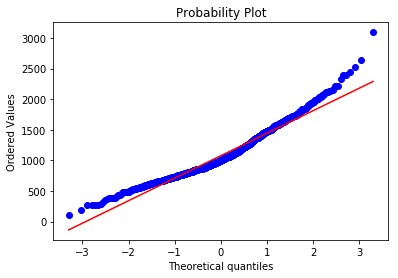

In [206]:
res = stats.probplot(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)
res

# Homoscedasticity

Homoscedasticity is all about assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)

# We can only measure it with a Graph

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

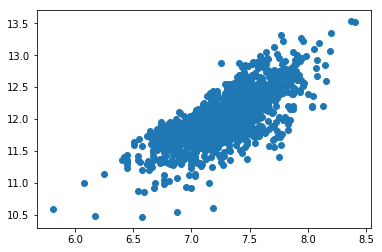

In [212]:
# Starting by 'SalePrice' and 'GrLivArea'...
#scatter plot
plt.scatter(dataset['GrLivArea'], dataset['SalePrice']);

In [214]:
# Before Normalization using log, this graph is conic...


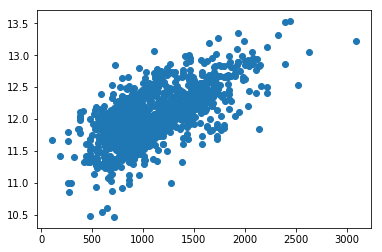

In [215]:
# Now let's check 'SalePrice' with 'TotalBsmtSF'.
# scatter plot
plt.scatter(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'], dataset[dataset['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Last one: Dummy Variables

In [216]:
dataset = pd.get_dummies(dataset)

In [217]:
dataset.shape

(1455, 222)

In [226]:
for i,j in enumerate(dataset.columns):
    print(i,j)

0 Id
1 MSSubClass
2 LotArea
3 OverallQual
4 OverallCond
5 YearBuilt
6 YearRemodAdd
7 BsmtFinSF1
8 BsmtFinSF2
9 BsmtUnfSF
10 TotalBsmtSF
11 1stFlrSF
12 2ndFlrSF
13 LowQualFinSF
14 GrLivArea
15 BsmtFullBath
16 BsmtHalfBath
17 FullBath
18 HalfBath
19 BedroomAbvGr
20 KitchenAbvGr
21 TotRmsAbvGrd
22 Fireplaces
23 GarageCars
24 GarageArea
25 WoodDeckSF
26 OpenPorchSF
27 EnclosedPorch
28 3SsnPorch
29 ScreenPorch
30 PoolArea
31 MiscVal
32 MoSold
33 YrSold
34 SalePrice
35 HasBsmt
36 MSZoning_C (all)
37 MSZoning_FV
38 MSZoning_RH
39 MSZoning_RL
40 MSZoning_RM
41 Street_Grvl
42 Street_Pave
43 LotShape_IR1
44 LotShape_IR2
45 LotShape_IR3
46 LotShape_Reg
47 LandContour_Bnk
48 LandContour_HLS
49 LandContour_Low
50 LandContour_Lvl
51 Utilities_AllPub
52 Utilities_NoSeWa
53 LotConfig_Corner
54 LotConfig_CulDSac
55 LotConfig_FR2
56 LotConfig_FR3
57 LotConfig_Inside
58 LandSlope_Gtl
59 LandSlope_Mod
60 LandSlope_Sev
61 Neighborhood_Blmngtn
62 Neighborhood_Blueste
63 Neighborhood_BrDale
64 Neighborhood_B